In [1]:
import os
import source_data_helper as sc
import pandas as pd
import locale
from datetime import datetime as dt
import visuals as vs
import numpy as np

#set locale to germany due to comma separation of numbers
locale.setlocale(locale.LC_ALL, "german")
cwd = os.getcwd()
source_path = os.path.join(cwd, 'sources', '2015')
#test_path = os.path.join(source_path,"DE_Sekundärregelleistung.csv")

dfs_to_modify = sc.read_multiple_csv(source_path, ['DE_Ausgleichsenergie.csv','DE_Minutenreserve.csv','DE_Primärregelleistung.csv','DE_Prognostizierte Erzeugung.csv','DE_Prognostizierter Stromverbrauch.csv','DE_Realisierte Erzeugung.csv','DE_Realisierter Stromverbrauch.csv','DE_Sekundärregelleistung.csv'])

#ausgleich_df = sc.read_csv(test_path)
#ausgleich_df = sc.convert_to_hourly(ausgleich_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


dataset has 35040 samples with 4 features each.
dataset has 35040 samples with 10 features each.
dataset has 35040 samples with 4 features each.
dataset has 35040 samples with 7 features each.
dataset has 35040 samples with 3 features each.
dataset has 35040 samples with 14 features each.
dataset has 35040 samples with 3 features each.
dataset has 35040 samples with 10 features each.


In [2]:
dfs_modified = sc.convert_multiple_to_hourly(dfs_to_modify)
#dfs_modified[1].head(20)

Modified dataset has 8760 samples with 4 features each.
Modified dataset has 8760 samples with 10 features each.
Modified dataset has 8760 samples with 4 features each.
Modified dataset has 8760 samples with 7 features each.
Modified dataset has 8760 samples with 3 features each.
Modified dataset has 8760 samples with 14 features each.
Modified dataset has 8760 samples with 3 features each.
Modified dataset has 8760 samples with 10 features each.


In [3]:
# DE_Kommerzieller Außenhandel wird nicht betrachtet, da nur der deutsche Markt im Fokus ist
dfs_no_modify = sc.read_multiple_csv(source_path, ['DE_Großhandelspreise.csv','DE_Physikalischer Stromfluss.csv'])

dataset has 8760 samples with 14 features each.
dataset has 8760 samples with 21 features each.


In [4]:
# join new dataframes list with the previous join to get master dataframe
dfs_modified.extend(dfs_no_modify)
# Merge all dataframes in the list iteratively with keys= Datum, Uhrzeit
master_df = sc.join(dfs_modified)
# get list of columns with minimum 60% NaNs
drop_columns = sc.get_nan_columns(master_df,5)
print(len(drop_columns))
# drop columns
master_df.drop(drop_columns,1,inplace=True)

21


In [5]:
# drop all country data not related to Germany
master_df.drop(['DÃ¤nemark 1[Euro/MWh]', 'DÃ¤nemark 2[Euro/MWh]','Frankreich[Euro/MWh]','Italien (Nord)[Euro/MWh]', 
       'Niederlande[Euro/MWh]', 'Polen[Euro/MWh]', 'Schweden 4[Euro/MWh]',
       'Schweiz[Euro/MWh]', 'Slowenien[Euro/MWh]', 'Tschechien[Euro/MWh]',
       'Ungarn[Euro/MWh]', 'Niederlande (Export)[MWh]',
       'Niederlande (Import)[MWh]', 'Schweiz (Export)[MWh]',
       'Schweiz (Import)[MWh]', 'DÃ¤nemark (Export)[MWh]',
       'DÃ¤nemark (Import)[MWh]', 'Tschechien (Export)[MWh]',
       'Tschechien (Import)[MWh]', 'Schweden (Export)[MWh]',
       'Schweden (Import)[MWh]', 'Ã–sterreich (Export)[MWh]',
       'Ã–sterreich (Import)[MWh]', 'Frankreich (Export)[MWh]',
       'Frankreich (Import)[MWh]', 'Polen (Export)[MWh]',
       'Polen (Import)[MWh]', 'Abgerufene Menge (+)[MWh]_x','Abgerufene Menge (-)[MWh]_x','Arbeitspreis (+)[Euro/MWh]_x','Arbeitspreis (-)[Euro/MWh]_x','Vorgehaltene Menge (+)[MW]_x','Vorgehaltene Menge (-)[MW]_x','Abgerufene Menge (+)[MWh]_y','Abgerufene Menge (-)[MWh]_y','Vorgehaltene Menge (+)[MW]_y','Vorgehaltene Menge (-)[MW]_y'], 1, inplace=True, errors='ignore')

In [ ]:
"""master_df[['Ausgleichsvolumen[MWh]',
       'Ausgleichsenergiepreis[Euro/MWh]', 'Abgerufene Menge (+)[MWh]_x',
       'Abgerufene Menge (-)[MWh]_x', 'Arbeitspreis (+)[Euro/MWh]_x',
       'Arbeitspreis (-)[Euro/MWh]_x', 'Vorgehaltene Menge (+)[MW]_x',
       'Vorgehaltene Menge (-)[MW]_x', 'Leistungspreis (+)[Euro/MW]_x',
       'Leistungspreis (-)[Euro/MW]_x', 'Vorgehaltene Menge[MW]',
       'Leistungspreis[Euro/MW]', 'Gesamt[MWh]_x', 'Wind Offshore[MWh]_x',
       'Wind Onshore[MWh]_x', 'Photovoltaik[MWh]_x', 'Sonstige[MWh]',
       'Gesamt[MWh]_y', 'Biomasse[MWh]', 'Wasserkraft[MWh]',
       'Wind Offshore[MWh]_y', 'Wind Onshore[MWh]_y',
       'Photovoltaik[MWh]_y', 'Sonstige Erneuerbare[MWh]',
       'Kernenergie[MWh]', 'Braunkohle[MWh]', 'Steinkohle[MWh]',
       'Erdgas[MWh]', 'Pumpspeicher[MWh]', 'Sonstige Konventionelle[MWh]',
       'Gesamt[MWh]', 'Abgerufene Menge (+)[MWh]_y',
       'Abgerufene Menge (-)[MWh]_y', 'Arbeitspreis (+)[Euro/MWh]_y',
       'Arbeitspreis (-)[Euro/MWh]_y', 'Vorgehaltene Menge (+)[MW]_y',
       'Vorgehaltene Menge (-)[MW]_y', 'Leistungspreis (+)[Euro/MW]_y',
       'Leistungspreis (-)[Euro/MW]_y',
       'Deutschland/Ã–sterreich/Luxemburg[Euro/MWh]']].apply(pd.to_numeric, errors='ignore')"""

In [ ]:
#master_df['date_time'] = dt.now()
#display(master_df.columns.values)
#master_df = sc.create_date_time(master_df)

In [6]:
display(master_df.describe())

,Ausgleichsvolumen[MWh],Ausgleichsenergiepreis[Euro/MWh],Vorgehaltene Menge[MW],Wind Offshore[MWh]_x,Wind Onshore[MWh]_x,Photovoltaik[MWh]_x,Gesamt[MWh]_y,Biomasse[MWh],Wasserkraft[MWh],Wind Offshore[MWh]_y,...,Sonstige Erneuerbare[MWh],Kernenergie[MWh],Braunkohle[MWh],Steinkohle[MWh],Erdgas[MWh],Pumpspeicher[MWh],Gesamt[MWh],Arbeitspreis (+)[Euro/MWh]_y,Arbeitspreis (-)[Euro/MWh]_y,Deutschland/Ã–sterreich/Luxemburg[Euro/MWh]
count,9782.000000,9782.000000,9782.000000,9758.000000,9782.000000,9782.000000,9734.000000,9669.000000,9719.000000,9782.000000,...,9660.000000,9758.000000,9638.000000,9708.000000,9726.000000,9753.000000,9782.000000,9782.000000,9782.000000,9662.000000
mean,142.987528,35.235901,578.049070,271.918810,2031.148001,910.980219,13153.759991,992.741907,384.157089,246.618969,...,17.050751,2433.589004,3844.956033,2269.637078,273.387672,143.242592,13218.155745,57.478541,1.151634,31.106734
std,454.238639,195.627099,0.492915,199.392326,1649.084080,1500.925113,2592.786658,56.333226,84.058809,194.716318,...,4.917667,319.768934,592.996599,1284.457935,235.330375,202.577548,2678.214758,12.046317,23.325256,11.984064
min,-3210.000000,-5997.420000,578.000000,1.000000,110.500000,0.000000,7253.500000,660.500000,202.250000,0.250000,...,6.500000,1136.500000,1332.500000,103.750000,7.250000,0.000000,7918.000000,0.000000,-476.920000,-79.940000
25%,-97.000000,0.850000,578.000000,98.062500,838.500000,0.000000,10917.875000,963.000000,318.250000,80.562500,...,12.250000,2270.250000,3487.500000,984.500000,132.250000,0.000000,10915.187500,51.050000,0.192500,25.020000
50%,129.000000,48.210000,578.000000,210.750000,1695.250000,0.250000,13010.625000,992.000000,367.250000,192.750000,...,14.750000,2511.875000,4023.250000,2279.750000,208.250000,41.250000,12969.750000,56.015000,5.390000,29.445000
75%,407.000000,66.207500,578.000000,450.500000,2620.250000,1337.437500,15546.875000,1003.500000,442.750000,387.937500,...,23.000000,2661.937500,4259.687500,3382.250000,293.500000,222.500000,15696.187500,61.010000,9.670000,38.480000
max,3271.000000,5824.630000,583.000000,739.500000,8994.000000,6467.500000,17935.500000,1189.750000,722.750000,737.250000,...,25.000000,2868.500000,4793.500000,4920.000000,2100.250000,1324.250000,18975.250000,364.300000,24.800000,99.770000


In [7]:
master_df.dropna(how='any', inplace=True)
#master_df.reset_index(inplace=True)

In [8]:
master_df.shape[0]
master_df.to_csv('out.csv')

### Feature Scaling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

y = master_df['Deutschland/Ã–sterreich/Luxemburg[Euro/MWh]']
# Remove features Date and Time as this cannot be processed by logarithmic functions
X = master_df.drop(['Deutschland/Ã–sterreich/Luxemburg[Euro/MWh]','Datum', 'Uhrzeit','date_time'], axis = 1, errors='ignore')

scaler = preprocessing.RobustScaler()
# Perform feature scaling on X
X_scaled = scaler.fit_transform(X)
# create scaled version of master_df (remove Date and Time)
scaled_data = master_df.drop(['Datum', 'Uhrzeit','date_time'], axis = 1, errors='ignore')
scaled_data = scaler.fit_transform(scaled_data)
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y , test_size=0.25, random_state=35)


In [10]:
#display(master_df.describe())
#display(master_df.columns.values)

# TODO: Create a decision tree regressor and fit it to the training set
#regressor = DecisionTreeRegressor(random_state=35)
regressor = DecisionTreeRegressor(random_state=15, max_depth=6)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
score

0.806841364426182

### Implementation of a performance metric

In [11]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Learning Curves

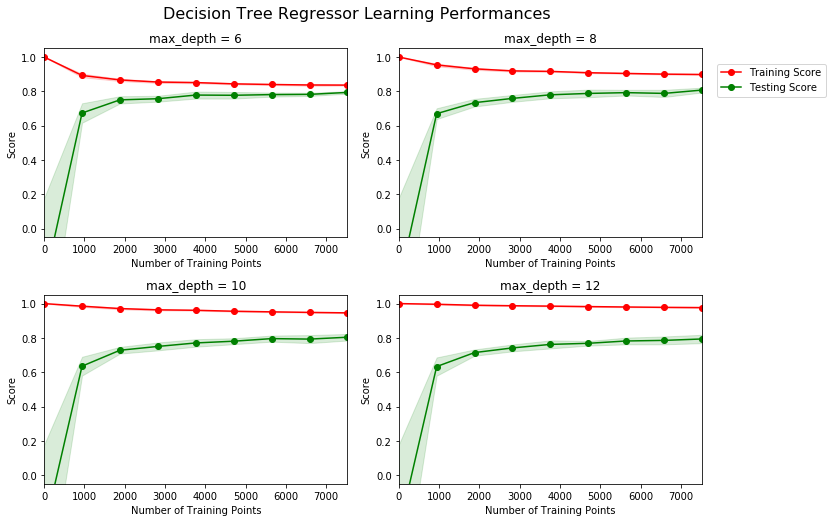

In [12]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(X_scaled, y)

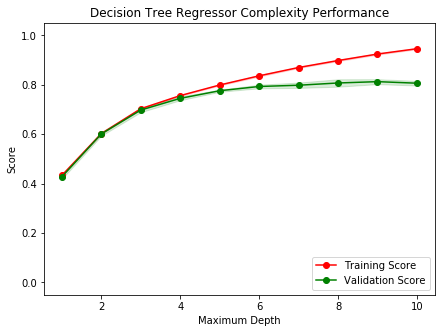

In [13]:
vs.ModelComplexity(X_scaled, y)

In [ ]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
"""from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
     Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. 
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [8, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    #scoring_fnc = make_scorer(r2_score)
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_  """

In [58]:
# Fit the training data to the model using grid search
"""reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))"""

a = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15])
b = np.array([7, 4, 13, 9])
c = np.argwhere(set(b).issubset(a))

[[0]]


In [68]:
from collections import Counter

out_counter = Counter()


# For each feature find the data points with extreme high or low values
for feature in scaled_data.T:
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(feature,25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(feature,75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    #new_log_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    new_data = feature[~((feature >= Q1 - step) & (feature <= Q3 + step))]
    
    #savr indices
    new_data_index = []
    feature_list = feature.tolist()
    for data in new_data:
        if data in feature_list:
            new_data_index.append(feature_list.index(data))
            
    display(new_data[0:5])
    for index in new_data_index:
        out_counter[index] += 1
        
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [list(out_counter.elements())]

print (list(out_counter.elements()))

# Remove the outliers, if any were specified
#good_data = scaled_data.drop(scaled_data.index[outliers]).reset_index(drop = True)
good_data = np.delete(scaled_data, ([outliers]), axis=0)

Data points considered outliers for the feature '[ 0.15991903  0.81781377  0.0465587  ... -0.41093117 -1.25303644
 -0.87651822]':


array([-2.48380567, -2.01417004,  2.22267206, -1.94939271, -1.97165992])

Data points considered outliers for the feature '[-0.03816199  0.48707165  0.45607477 ... -1.35451713 -0.94953271
 -0.94345794]':


array([-3.22741433, -5.94922118, -5.08380062, -2.80732087,  2.85747664])

Data points considered outliers for the feature '[0. 0. 0. ... 5. 5. 5.]':


array([5., 5., 5., 5., 5.])

Data points considered outliers for the feature '[-0.46975089 -0.46476868 -0.45551601 ...  0.78647687  0.79430605
  0.82704626]':


array([], dtype=float64)

Data points considered outliers for the feature '[-0.6733683  -0.6863345  -0.7016317  ...  0.16958042  0.14408508
  0.11130536]':


array([2.01544289, 2.10198135, 2.26762821, 2.50626457, 2.71853147])

Data points considered outliers for the feature '[-0.00018498 -0.00018498 -0.00018498 ... -0.00018498 -0.00018498
 -0.00018498]':


array([2.65963744, 2.63152053, 2.73788383, 2.93322235, 2.76045135])

Data points considered outliers for the feature '[-0.2600868  -0.39505974 -0.49295397 ... -0.41290253 -0.42527997
 -0.58061405]':


array([], dtype=float64)

Data points considered outliers for the feature '[ 0.16969697 -0.41212121  0.20606061 ...  4.61212121  4.61212121
  4.57575758]':


array([-2.22424242, -2.41212121, -6.70909091, -2.98787879, -3.02424242])

Data points considered outliers for the feature '[ 0.15686275  0.2372549   0.18823529 ... -0.91960784 -0.89411765
 -0.76862745]':


array([2.71960784, 2.71176471, 2.65294118, 2.71764706, 2.59803922])

Data points considered outliers for the feature '[-0.50081566 -0.50815661 -0.52120718 ...  0.70554649  0.90375204
  1.21533442]':


array([], dtype=float64)

Data points considered outliers for the feature '[-0.66637168 -0.72168142 -0.76106195 ... -0.07418879 -0.08923304
 -0.12536873]':


array([2.11327434, 2.28613569, 2.36106195, 2.4259587 , 2.39100295])

Data points considered outliers for the feature '[0. 0. 0. ... 0. 0. 0.]':


array([2.58672215, 2.59390959, 2.89521468, 3.32078684, 3.33043314])

Data points considered outliers for the feature '[-0.02325581 -0.02325581 -0.02325581 ...  0.76744186  0.76744186
  0.76744186]':


array([], dtype=float64)

Data points considered outliers for the feature '[0.871877   0.87572069 0.87379885 ... 0.26201153 0.37027546 0.42280589]':


array([-3.54067905, -2.256246  , -2.27482383, -2.48110186, -2.24855862])

Data points considered outliers for the feature '[ 0.55030935  0.58156952  0.59003582 ... -0.44448063 -0.44610876
 -0.43633995]':


array([-2.20807555, -2.43731683, -2.69586454, -2.689352  , -2.91957017])

Data points considered outliers for the feature '[ 0.04498449 -0.04715615 -0.0262668  ... -0.29524302 -0.32233713
 -0.39389866]':


array([], dtype=float64)

Data points considered outliers for the feature '[-0.34128167 -0.36065574 -0.36363636 ...  0.64083458  0.56035768
  0.52011923]':


array([2.07302534, 3.19076006, 3.16989568, 2.30253353, 2.51564829])

Data points considered outliers for the feature '[-0.17553794 -0.07021518 -0.17553794 ...  0.00566251 -0.01812005
  0.3590034 ]':


array([2.40883352, 2.49490374, 2.85277463, 2.52208381, 2.54926387])

Data points considered outliers for the feature '[-0.20968244 -0.35076795 -0.42714819 ... -0.36975924 -0.38039643
 -0.46362599]':


array([], dtype=float64)

Data points considered outliers for the feature '[ 1.36707566  2.10429448  1.44785276 ... -0.44274029 -0.47239264
 -0.4591002 ]':


array([2.10429448, 2.11554192, 2.25766871, 3.32208589, 3.17689162])

Data points considered outliers for the feature '[ 0.17275748  0.23145072  0.24031008 ... -2.94130676 -3.73089701
 -3.3820598 ]':


array([-2.56035437, -2.08637874, -2.11406423, -2.7585825 , -2.88815061])

Data points considered outliers for the feature '[ 0.03862974  0.0787172   0.05539359 ... -0.23469388  0.03644315
  0.15306122]':


array([-2.14577259, -2.29956268, -2.44897959, -2.51822157, -2.44970845])

[36, 36, 108, 108, 108, 108, 108, 142, 142, 142, 142, 142, 142, 142, 164, 164, 164, 164, 239, 239, 283, 283, 283, 417, 417, 462, 462, 510, 510, 510, 512, 512, 512, 523, 523, 523, 523, 525, 525, 525, 525, 525, 534, 564, 617, 617, 647, 647, 647, 647, 763, 763, 763, 765, 766, 767, 768, 769, 770, 860, 911, 952, 952, 981, 982, 982, 1051, 1052, 1053, 1053, 1053, 1057, 1057, 1074, 1074, 1120, 1120, 1120, 1126, 1126, 1126, 1127, 1127, 1127, 1128, 1170, 1170, 1171, 1171, 1171, 1175, 1175, 1197, 1197, 1197, 1197, 1197, 1203, 1211, 1219, 1219, 1243, 1243, 1243, 1243, 1243, 1251, 1252, 1252, 1252, 1258, 1276, 1276, 1290, 1290, 1366, 1372, 1372, 1372, 1372, 1393, 1393, 1393, 1412, 1412, 1412, 1412, 1412, 1412, 1412, 1413, 1413, 1413, 1413, 1414, 1414, 1414, 1414, 1415, 1415, 1415, 1415, 1415, 1416, 1416, 1416, 1416, 1416, 1416, 1424, 1424, 1443, 1443, 1443, 1443, 1533, 1533, 1674, 1674, 1674, 1706, 1706, 1706, 1724, 1724, 1737, 1737, 1737, 1737, 1737, 1738, 1738, 1738, 1743, 1743, 1743, 1746, 1746,

### Visualize feature distrubution

In [69]:
print(len(good_data))

5269


In [ ]:
pd.plotting.scatter_matrix(master_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
master_df.corr()

### Create samples

In [ ]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [245,3045,6368]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(X.loc[indices], columns = X.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

In [ ]:
import seaborn as sns

percentiles_data = 100*X.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

In [ ]:
#master_df = master_df.drop(['Uhrzeit'], 1)
# TODO: Scale the data using the natural logarithm
log_data = np.log(X_scaled)

# TODO: Scale the sample data using the natural logarithm
#log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:
np.isnan(master_df).any()
np.isnan(samples).any()

In [ ]:
display(master_df.columns.values)